# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed

medical = pd.read_csv('data/insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [5]:
mc_std=np.std(medical['charges'],ddof=1)

mc_m=np.mean(medical['charges'])
print( 'The mean is ', mc_m ,' and the standard deviation is ', mc_std)

The mean is  13270.422265141257  and the standard deviation is  12110.011236693994


In [6]:
mc_m+mc_std

25380.43350183525

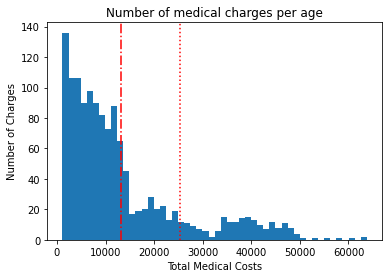

In [7]:
plt.hist(medical['charges'],bins=50)
plt.xlabel('Total Medical Costs')
plt.ylabel('Number of Charges')
plt.title('Number of medical charges per age')
plt.axvline(np.mean(medical['charges']), color='r', linestyle='-.')
plt.axvline((mc_m+mc_std),color='r',linestyle=':')


In [8]:
mc_std=np.std(medical['charges'],ddof=1)
mc_std

12110.011236693994

In [9]:
mc_m=np.mean(medical['charges'])
mc_m

13270.422265141257

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The data shows that the mean is 13270.42 which ahs not fallen below 12,000.  Although looking at the graph majority of the charges dow fall below 12,000.    A good way to test if the charges do fall below 12,000 is a z-test

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ one sided t-test.   since we only care about if it it is less than 12,000.  If we wanted to see if there is a difference then we would do one sided t-test 

In [10]:
len(medical['charges'])

1338

In [14]:
zval=1-((1-.95)/2)
zval

0.975

In [15]:
critical_value=round(t.ppf(zval, df = 1338-1),2)
margin_error_95=critical_value*(mc_std/np.sqrt(1338-1))
margin_error_95

649.1348323443733

In [16]:
round(mc_m-margin_error_95,2)

12621.29

**Answer- Should the administrator be worried?**

No, the administrataor should not be concerned that the mean medical charges are less than 12,000.00 since the confidence level is 649.13 and if you take the lower limit of the mean it still 12,621.29 which is still above the $12,000.  

__Question__The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__  The null hypothesiss is that people with insurance are charged the same as the people without. Which means the Mean of people with insurance is the same as the Mean of the people without insurance.    The alternative hypothesis is that there is a difference in charge from people who have insurance and does not.  

We are assuming that the variance is equal variance.  

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [17]:
#splitting the data.  

med=medical[['charges','insuranceclaim']]
#med['insurance']=medical['insuranceclaim']
ins= med['insuranceclaim']==1
noin=med ['insuranceclaim']==0
# creating the two new dataframe 1 with insurance and the other without
med1=med[ins]
med0=med[noin]

In [18]:
med1

,charges,insuranceclaim
0,16884.92400,1
1,1725.55230,1
4,3866.85520,1
6,8240.58960,1
10,2721.32080,1
...,...,...
1330,12629.16560,1
1331,10795.93733,1
1334,2205.98080,1
1335,1629.83350,1


#####  Manually doing the test statistics

In [39]:
# mean of people with insurance  (mean under null hypothesis)
m_ins=np.mean(med0['charges'])
m_ins

8821.421892306294

In [40]:
m_noins

16423.928276537663

In [41]:
#mean of people without insurance (sample mean)
m_noins=np.mean(med1['charges'])

# mean no insurance sample std deviation.
m_nostd=np.std(med1['charges'],ddof=1)

#no insurance sample size
mno=len(med1['charges'])

#no insurance  standard error
stderror_nois= m_nostd/(np.sqrt(mno))

In [42]:
# finding the T-stat for no insurance
tstat_noins= (m_ins-m_noins)/(stderror_nois)
tstat_noins

-15.145625839370716

__Answer__: Since the t statistic is extremely larger than the t statistic.  It means the p value is less than 5% which means we can not reject the null hypothesis.  Which means that people with insurancce is not the same as the people with insurance.  

In [43]:
#confirming above by applying critical values to the mean.
# Finding Critical Value if it was at a 95% confidence interval
critical_value_noins=round(t.ppf(zval, df= mno-1),2)
margin_error_95_noins=critical_value_noins*(m_nostd/np.sqrt(mno-1))
margin_error_95_noins
print ('confidence interval is ', m_ins+margin_error_95_noins, "and", m_ins-margin_error_95_noins)
print("The mean of no insurance is ", m_noins, " which means that it is not within the range which means it is diffferent than people with insurance ")

confidence interval is  9805.893386913816 and 7836.950397698773
The mean of no insurance is  16423.928276537663  which means that it is not within the range which means it is diffferent than people with insurance 


__Using scipy__

In [45]:
stats.ttest_ind(med0['charges'], med1['charges'])


Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ stats.ttest_1samp is a possible way to calculate.  The other way is by computing the zscore and then using that data to calculate the ttest.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test